In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

## Common Russian Data


In [3]:
brent = pd.read_csv('Данные/Brent.csv')
brent = brent[brent['Date'] >= '2014-01-15']
brent.rename(columns={'Price': 'Brent'}, inplace=True)
brent['Date'] = pd.date_range(start='2014-01-01', end='2025-01-01', freq='ME')
brent.reset_index(drop=True, inplace=True)
brent.head()

,Date,Brent
0,2014-01-31,108.12
1,2014-02-28,108.90
2,2014-03-31,107.48
3,2014-04-30,107.76
4,2014-05-31,109.54


In [4]:
infl_exp = pd.read_excel('Данные/Infl_expectation.xlsx')
infl_exp.columns = ['Date', 'Infl_exp']
infl_exp['Date'] = pd.date_range(
    start='2014-01-01', end='2025-02-01', freq='ME')
infl_exp.head()

,Date,Infl_exp
0,2014-01-31,13.04
1,2014-02-28,11.80
2,2014-03-31,11.52
3,2014-04-30,12.67
4,2014-05-31,11.72


In [5]:
m2 = pd.read_excel('Данные/M2.xlsx')
m2.columns = ['Date', 'M2']
m2 = m2[m2['Date'] >= '2014-01-01']
m2['Date'] = pd.date_range(start='2014-01-01', end='2025-03-01', freq='ME')
m2.reset_index(drop=True, inplace=True)
m2.head()

,Date,M2
0,2014-01-31,31155.60
1,2014-02-28,29861.20
2,2014-03-31,30169.00
3,2014-04-30,29519.30
4,2014-05-31,29879.00


In [6]:
miacr = pd.read_excel('Данные/miacr.xlsx')
miacr.columns = ['Date', 'MIACR']
miacr.set_index('Date', inplace=True)
miacr = miacr.resample('ME').mean()
miacr.index = miacr.index.to_period(
    'M').to_timestamp('M') - pd.offsets.MonthBegin(1)
miacr.reset_index(inplace=True)
miacr['Date'] = pd.date_range(start='2014-01-01', end='2025-04-01', freq='ME')
miacr.head()

,Date,MIACR
0,2014-01-31,6.06
1,2014-02-28,5.99
2,2014-03-31,7.85
3,2014-04-30,7.87
4,2014-05-31,8.21


In [7]:
obligates = pd.read_excel('Данные/доходность ОФЗ.xlsx')
obligates['Date'] = pd.bdate_range('2014-01-06', '2024-10-08')
obligates['obligates'].astype('float')
obligates['year'] = obligates['Date'].dt.year
obligates['month'] = obligates['Date'].dt.month
ofz = obligates.groupby(['year', 'month'], as_index=False)[
    ['obligates']].mean()
ofz['Date'] = pd.date_range('2014-01-01', '2024-11-01', freq='ME')
ofz = ofz[['Date', 'obligates']]
ofz

,Date,obligates
0,2014-01-31,6.20
1,2014-02-28,6.39
2,2014-03-31,7.40
3,2014-04-30,7.50
4,2014-05-31,7.95
...,...,...
125,2024-06-30,21.45
126,2024-07-31,21.72
127,2024-08-31,18.67
128,2024-09-30,18.85


## Regional Data


In [8]:
fm_names = ['Изменение экономической конъюнк', 'Изменение экономического полож', 'Индикатор бизнес-климата',
            'Изменение цен на готовую продук', 'Изменение рисков хозяйственной', 'Влияние изменения валютного кур',
            'Изменение условий кредитования', 'Ожидания изменение цен на готов', 'Ожидания изменение спроса на пр',
            'Ожидания изменение объемов прои', 'Изменение спроса на продукцию',
            'Изменение издержек производства', 'Изменение объемов производства']

fm_heading = ['econom_cond', 'econom_position', 'ibk', 'price_final_prod', 'consumer_risk', 'currency_index',
              'credit_cond', 'price_exp', 'demand_exp', 'volume_exp', 'changes_demand',
              'changes_costs', 'changes_volume']

for i in range(len(fm_names)):
    df_head = f'fm_{fm_heading[i]}'
    globals()[df_head] = pd.read_excel(
        'Данные/МП.xlsx', sheet_name=fm_names[i])
    cols = list(map(str.strip, globals()[df_head].columns))
    globals()[df_head].columns = cols
    globals()[df_head]['Date'] = pd.date_range(
        '2014-01-01', '2023-11-01', freq='ME')
    date = globals()[df_head].pop('Date')
    globals()[df_head].insert(0, 'Date', date)
    globals()[df_head].drop(['date'], axis=1, inplace=True)
    globals()[df_head].reset_index(drop=True, inplace=True)
    globals()[df_head] = globals()[df_head].reindex(
        sorted(globals()[df_head].columns), axis=1)
    globals()[df_head].columns = globals()[
        df_head].columns.str.replace(' ', '_')


fm_demand_exp.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Тюменская_область,Удмуртская_Республика,Ульяновская_область,Хабаровский_край,Челябинская_область,Чувашская_Республика,Чукотский_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,7.17,11.48,22.22,22.22,22.44,35.71,19.55,14.00,14.50,...,17.36,24.70,23.50,12.92,23.36,23.80,34.92,16.79,14.50,17.50
1,2014-02-28,12.92,8.20,30.86,30.86,32.00,33.04,17.51,18.75,7.30,...,15.57,25.70,17.10,18.31,26.05,24.20,28.57,22.73,8.80,14.40
2,2014-03-31,13.82,8.80,28.40,28.40,24.34,25.45,22.33,21.62,13.80,...,12.30,9.00,20.70,17.42,34.42,19.10,23.44,17.29,10.30,18.50
3,2014-04-30,15.47,9.09,28.40,28.40,23.33,17.27,14.81,20.75,12.10,...,22.76,13.60,11.40,16.57,32.09,23.60,15.87,20.74,7.00,16.40
4,2014-05-31,17.13,8.06,24.69,24.69,25.68,22.94,11.27,26.11,10.10,...,4.10,11.50,15.50,14.80,28.97,24.50,41.54,17.04,10.50,15.80


In [9]:
fm_df_names = ['Изм. эконом. конъюнктуры', 'Изм. эконом. полож', 'Индикатор бизнес-климата', 'Изм. цен на готовую продукцию', 'Изм. рисков хозяйственной деят.', 
              'Влияние изм. валютного курса', 'Изм. условий кредитования', 'Ожидания изм. цен на готовую продукцию', 'Ожидания изм. спроса на продукцию', 
              'Ожидания изменение объемов произв.', 'Изм. спроса на продукцию', 'Изм. издержек производства', 'Изм. объемов производства']

In [10]:
inflation = pd.read_excel('Данные/бипц1.xls', sheet_name='1')
cols = list(map(str.strip, inflation.columns))
inflation.columns = cols
inflation.ffill()
inflation['Date'] = pd.date_range(
    start='2014-01-01', end='2025-02-01', freq='ME')
date = inflation.pop('Date')
inflation.insert(0, 'Date', date)
inflation.reset_index(drop=True, inplace=True)
inflation = inflation.reindex(sorted(inflation.columns), axis=1)
inflation.columns = inflation.columns.str.replace(' ', '_')
inflation.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,100.38,100.50,100.44,100.47,100.56,100.44,100.42,100.20,100.29,...,100.18,100.21,100.50,99.84,100.65,100.26,100.37,100.59,100.55,100.52
1,2014-02-28,100.50,100.34,100.61,100.18,100.13,100.35,100.51,100.73,100.46,...,100.60,100.55,100.35,100.15,100.62,100.81,100.61,100.48,100.55,100.56
2,2014-03-31,101.38,100.64,100.78,100.80,100.21,100.97,101.15,100.93,100.68,...,100.66,100.50,100.66,100.44,100.38,100.97,100.49,101.16,101.06,100.82
3,2014-04-30,100.62,101.02,100.74,100.93,101.10,100.97,101.24,100.89,100.70,...,100.68,100.58,100.63,100.49,100.93,100.20,100.45,100.99,101.07,100.94
4,2014-05-31,101.20,100.49,100.44,100.58,100.66,101.66,101.41,100.91,100.94,...,100.87,100.27,100.73,99.81,100.91,100.16,101.32,100.74,100.76,101.43


In [11]:
unemp = pd.read_excel('Данные/unemp.xlsx', sheet_name='unemp')
unemp['Date'] = pd.to_datetime(unemp['Date'])
unemp.columns = unemp.columns.str.strip()
unemp.columns = unemp.columns.str.replace(' ', '_')
unemp

,Date,Российская_Федерация,Белгородская_область,Брянская_область,Владимирская_область,Воронежская_область,Ивановская_область,Калужская_область,Костромская_область,Курская_область,...,Республика_Саха_(Якутия),Забайкальский_край,Камчатский_край,Приморский_край,Хабаровский_край,Амурская_область,Магаданская_область,Сахалинская_область,Еврейская_автономная_область,Чукотский_автономный_округ
0,2014-01-01,1.20,0.90,1.10,1.10,1.00,1.10,0.60,0.70,1.10,...,1.80,2.00,1.80,1.50,1.70,2.90,1.40,0.80,1.10,2.60
1,2014-02-01,1.20,0.90,1.10,1.20,1.00,1.10,0.60,0.80,1.10,...,1.70,1.90,1.60,1.30,1.30,2.90,1.50,0.60,0.80,2.50
2,2014-03-01,1.30,0.90,1.40,1.40,1.20,1.40,0.70,0.80,1.20,...,2.00,2.30,1.70,1.50,1.30,3.20,2.00,0.80,1.30,2.60
3,2014-04-01,1.20,0.70,1.20,1.20,1.00,1.10,0.70,0.70,1.00,...,2.30,1.80,1.70,1.40,1.00,2.90,1.80,0.70,1.10,2.20
4,2014-05-01,1.00,0.70,0.90,1.10,0.90,0.80,0.50,0.60,0.80,...,2.10,1.50,1.60,1.00,0.90,2.60,1.30,0.60,1.10,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2024-08-01,0.95,0.55,0.80,0.85,0.95,0.65,0.45,0.75,0.65,...,1.65,1.25,1.40,1.00,0.80,1.80,1.35,0.55,1.30,1.95
128,2024-09-01,1.00,0.50,0.80,0.80,1.10,0.70,0.50,0.80,0.70,...,1.60,1.50,1.40,1.10,0.80,1.50,1.40,0.60,1.60,1.80
129,2024-10-01,0.70,0.40,0.60,0.60,0.70,0.50,0.40,0.50,0.40,...,1.00,1.10,1.00,0.70,0.60,1.10,0.90,0.50,0.90,0.90
130,2024-11-01,0.60,0.30,0.40,0.40,0.50,0.30,0.30,0.30,0.30,...,0.80,0.80,0.80,0.60,0.40,0.80,0.70,0.40,0.70,0.80


In [12]:
import re
money_income = pd.read_excel('Данные/денежные доходы.xls', sheet_name='Лист1')
money_income['Date'] = pd.to_datetime(money_income['Date'])
money_income = money_income.reindex(sorted(money_income.columns), axis=1)
cols = money_income.columns.to_list()
final = []
for item in cols:
    final.append(re.sub(r'\([^\)]+\)', '', item).strip())
money_income.columns = final.copy()
money_income.columns = money_income.columns.str.replace(' ', '_')
money_income.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-01,17809.00,29882.00,33650.00,21643.00,22459.00,18885.00,20672.00,21723.00,24893.00,...,33217.00,50575.00,26101.00,21184.00,18868.00,71929.00,67195.00,22824.00,53584.00,36000.00
1,2014-02-01,17327.00,29190.00,31986.00,22139.00,21401.00,18285.00,20364.00,21557.00,25233.00,...,32559.00,50345.00,25533.00,21008.00,18718.00,69277.00,67915.00,22702.00,54916.00,36238.00
2,2014-03-01,18618.00,30973.00,33823.00,22788.00,22791.00,19830.00,21469.00,22498.00,25312.00,...,34280.00,61470.00,26462.00,21723.00,19717.00,72850.00,73441.00,23780.00,59128.00,40463.00
3,2014-04-01,18662.00,32071.00,35701.00,26134.00,23165.00,21196.00,22075.00,23898.00,27002.00,...,35728.00,57318.00,28264.00,21225.00,20313.00,80120.00,90329.00,25202.00,64400.00,40171.00
4,2014-05-01,19344.00,32364.00,36820.00,23686.00,23554.00,21154.00,22465.00,22014.00,26320.00,...,35836.00,59527.00,27410.00,22205.00,20964.00,79629.00,81500.00,25117.00,58432.00,39003.00


In [13]:
import re
trade_turnover = pd.read_excel(
    'Данные/динамика_розничного_товарооборота.xlsx', sheet_name='Лист1')
trade_turnover['Date'] = pd.to_datetime(trade_turnover['Date'])
# trade_turnover = trade_turnover.reindex(sorted(trade_turnover.columns), axis=1)
cols = trade_turnover.columns.to_list()
final = []
for item in cols:
    final.append(re.sub(r'\([^\)]+\)', '', item).strip())
trade_turnover.columns = final.copy()
trade_turnover.columns = trade_turnover.columns.str.replace(' ', '_')
trade_turnover.head()

,Date,Российская_Федерация,г._Москва,Московская_область,г._Санкт-Петербург,Краснодарский_край,Ростовская_область,Свердловская_область,Республика_Башкортостан,Республика_Татарстан,...,Камчатский_край,Карачаево-Черкесская_Республика,Республика_Калмыкия,Республика_Ингушетия,Магаданская_область,Республика_Тыва,Республика_Алтай,Еврейская_автономная_область,Чукотский_автономный_округ,Ненецкий_автономный_округ
0,2014-01-01,1840650960.80,319874599,108460075.70,67302140,77990884,52947669.70,73605206,51889786,56825008,...,3173252,2535329.00,1343824.50,1304694.60,1895779,1272848.00,1413076.60,1500717,464728,591700
1,2014-02-01,1853102881.76,322834637,107553370.20,72900455,79481852,53210615.70,71542571,48732886,56625429,...,3221532,2517728.40,1357665.70,1273935.16,1899865,1230460.00,1343536.00,1461419,419523,556272
2,2014-03-01,2032552773.82,354997936,124708518.00,80852478,76442605,59602141.30,79528391,51268693,62076974,...,3398612,2726591.00,1507333.40,1266087.22,2124179,1320151.00,1474885.30,1598257,453706,630787
3,2014-04-01,2023565042.70,356916104,122553390.50,81580387,74202638,58276550.80,78501124,55723715,62599070,...,3329497,2762386.70,1419254.60,1238803.70,2140215,1336181.00,1467922.50,1537713,455595,616782
4,2014-05-01,2075030365.12,346806002,133706705.70,80576483,72401123,60179433.80,83660262,58772203,61755215,...,3463203,2865209.40,1475817.00,1274963.32,2149723,1379814.00,1580844.50,1565918,408693,634887


In [14]:
debt_firms = pd.read_excel('Данные/задолженность_юр.xls')
cols = list(map(str.strip, debt_firms.columns))
debt_firms.columns = cols
debt_firms = debt_firms[debt_firms['month'].str.contains('-') == 0]
debt_firms['Date'] = pd.date_range(start='2014-01-01', end='2025-02-01', freq='ME')
date = debt_firms.pop('Date')
debt_firms.insert(0, 'Date', date)
debt_firms.drop(['year', 'month'], axis=1, inplace=True)
debt_firms.reset_index(drop=True, inplace=True)
debt_firms = debt_firms.reindex(sorted(debt_firms.columns), axis=1)
debt_firms.columns = debt_firms.columns.str.replace(' ', '_')
debt_firms.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,128271,33840,96682,36541,218657,63730,77908,132209,93995,...,124971,137722.00,314366,17917,94804.00,5058,125544,130068,6724491,1336574
1,2014-02-28,127666,34412,98356,36752,212615,64339,78326,133385,94111,...,125020,138425.00,335519,18671,93764.00,4949,127843,118477,6662149,1355738
2,2014-03-31,132560,32272,98934,37095,213605,64590,79716,134974,86324,...,125946,149995.00,347002,17783,94311.00,4506,117396,119044,6680316,1390857
3,2014-04-30,132871,32777,100700,37154,214755,64844,80706,135451,98299,...,127787,155446.00,347903,18036,94534.00,4874,117385,119073,6800508,1406487
4,2014-05-31,133605,33062,100637,37225,213583,65647,81658,135229,101564,...,128529,156774.00,352768,18513,93205.00,5222,116949,120194,6952824,1406521


In [15]:
paid_services = pd.read_excel('Данные/объем платных услуг.xls')
cols = list(map(str.strip, paid_services.columns))
paid_services.columns = cols
paid_services = paid_services[paid_services['month'].str.contains('-') == 0]
paid_services['Date'] = pd.date_range(
    start='2014-01-01', end='2024-04-01', freq='ME')
date = paid_services.pop('Date')
paid_services.insert(0, 'Date', date)
paid_services.drop(['year', 'month'], axis=1, inplace=True)
paid_services.reset_index(drop=True, inplace=True)
paid_services = paid_services.reindex(sorted(paid_services.columns), axis=1)
paid_services.columns = paid_services.columns.str.replace(' ', '_')
paid_services.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,1222227.80,2900057.90,4405802.60,2859222.40,5607051.40,3313633.90,4918551.60,9818283.10,3628160.90,...,9070106.30,7100536.90,10224654.30,2659865.40,3238109.90,277402.60,3026971.30,3659005.30,98389278.90,28950444.50
1,2014-02-28,1287226.30,3214893.40,4705042.30,3000332.30,5846879.30,3453973.60,4992916.10,10312071.50,3886565.10,...,9918022.00,7328075.70,10418260.80,3096250.00,3287213.60,297073.70,3204332.30,3533473.30,96705313.80,29337314.30
2,2014-03-31,1254021.40,3367412.50,4988669.50,2939450.90,5932783.10,3430976.50,5364232.10,10801270.90,4072760.80,...,10881703.00,7967728.30,10913285.30,3067913.60,3371816.80,280057.00,3545949.00,3886556.70,97423350.10,31783111.10
3,2014-04-30,1237841.80,3385204.30,5195905.70,2964512.80,5881579.90,3456498.30,5491976.30,10824181.10,4088728.20,...,11592908.40,7643942.10,11041072.40,3407861.00,3381803.00,285534.00,3403576.00,3726333.00,105016594.00,31447023.20
4,2014-05-31,1288983.30,3256951.10,5007149.70,2760722.80,5448840.40,3226869.50,5117365.80,10532465.70,3951865.40,...,10289523.40,8075343.40,10446104.90,2724495.20,3160771.10,283519.90,3206858.20,3548348.50,101844625.70,32058336.50


In [16]:
regions1 = list(map(str.strip, fm_econom_cond.columns))
regions1.remove('Date')
regions2 = list(map(str.strip, fm_econom_position.columns))
regions2.remove('Date')
regions3 = list(map(str.strip, fm_ibk.columns))
regions3.remove('Date')
regions4 = list(map(str.strip, fm_price_final_prod.columns))
regions4.remove('Date')
regions5 = list(map(str.strip, fm_consumer_risk.columns))
regions5.remove('Date')
regions6 = list(map(str.strip, fm_currency_index.columns))
regions6.remove('Date')
regions7 = list(map(str.strip, fm_credit_cond.columns))
regions7.remove('Date')
regions8 = list(map(str.strip, fm_price_exp.columns))
regions8.remove('Date')
regions9 = list(map(str.strip, fm_demand_exp.columns))
regions9.remove('Date')
regions10 = list(map(str.strip, fm_volume_exp.columns))
regions10.remove('Date')
regions11 = list(map(str.strip, fm_changes_demand.columns))
regions11.remove('Date')
regions12 = list(map(str.strip, fm_changes_costs.columns))
regions12.remove('Date')
regions13 = list(map(str.strip, fm_changes_volume.columns))
regions13.remove('Date')
regions14 = list(map(str.strip, unemp.columns))
regions14.remove('Date')
regions15 = list(map(str.strip, inflation.columns))
regions15.remove('Date')
regions16 = list(map(str.strip, paid_services.columns))
regions16.remove('Date')
regions17 = list(map(str.strip, money_income.columns))
regions17.remove('Date')
regions18 = list(map(str.strip, debt_firms.columns))
regions18.remove('Date')
regions19 = list(map(str.strip, trade_turnover.columns))
regions19.remove('Date')

In [17]:
region_columns = set(regions1) & set(regions2) & set(regions3) & set(regions4) & set(regions5) & set(regions6) &\
    set(regions7) & set(regions8) & set(regions9) & set(regions10) & set(regions11) & set(regions12) &\
    set(regions13) & set(regions14) & set(regions15) & set(regions16) & set(regions17) & set(regions18) &\
    set(regions19)
len(region_columns)

78

In [18]:
general_df = (
    brent
    .merge(miacr,    how='inner', on='Date')
    .merge(infl_exp, how='inner', on='Date')
    .merge(m2,       how='inner', on='Date')
    .merge(ofz,      how='inner', on='Date')
    .dropna()
)
general_df

,Date,Brent,MIACR,Infl_exp,M2,obligates
0,2014-01-31,108.12,6.06,13.04,31155.60,6.20
1,2014-02-28,108.90,5.99,11.80,29861.20,6.39
2,2014-03-31,107.48,7.85,11.52,30169.00,7.40
3,2014-04-30,107.76,7.87,12.67,29519.30,7.50
4,2014-05-31,109.54,8.21,11.72,29879.00,7.95
...,...,...,...,...,...,...
125,2024-06-30,82.25,15.73,12.41,102519.10,21.45
126,2024-07-31,85.15,16.16,12.89,103557.20,21.72
127,2024-08-31,80.36,17.76,12.52,104351.30,18.67
128,2024-09-30,74.02,18.46,13.41,106242.70,18.85


In [19]:
import os
os.makedirs('regional_data', exist_ok=True)
os.path.join(os.getcwd(), 'regional_data')

'/Users/askar/Desktop/ВКР/Diploma.-Inflation-model-using-PCA/regional_data'

In [20]:
datasets = [fm_econom_cond, fm_econom_position, fm_ibk, fm_price_final_prod, fm_consumer_risk, fm_currency_index, fm_credit_cond,
            fm_price_exp, fm_demand_exp, fm_volume_exp, fm_changes_demand, fm_changes_costs, fm_changes_volume, unemp, inflation,
            paid_services, money_income, debt_firms, trade_turnover]

names = ['fm_econom_cond', 'fm_econom_position', 'fm_ibk', 'fm_price_final_prod', 'fm_consumer_risk', 'fm_currency_index', 'fm_credit_cond',
         'fm_price_exp', 'fm_demand_exp', 'fm_volume_exp', 'fm_changes_demand', 'fm_changes_costs', 'fm_changes_volume', 'unemp', 'inflation',
         'paid_services', 'money_income', 'debt_firms', 'trade_turnover']

region_columns = list(region_columns)
for i in range(len(region_columns)):
    region = region_columns[i]
    df_head = f'raw_{region}'
    globals()[df_head] = general_df.copy()
    for j in range(len(datasets)):
        globals()[df_head] = datasets[j].loc[:, region].to_frame(name=names[j]).join(globals()[df_head])
        globals()[df_head].to_csv(f'regional_data/{df_head}.csv', index=False)

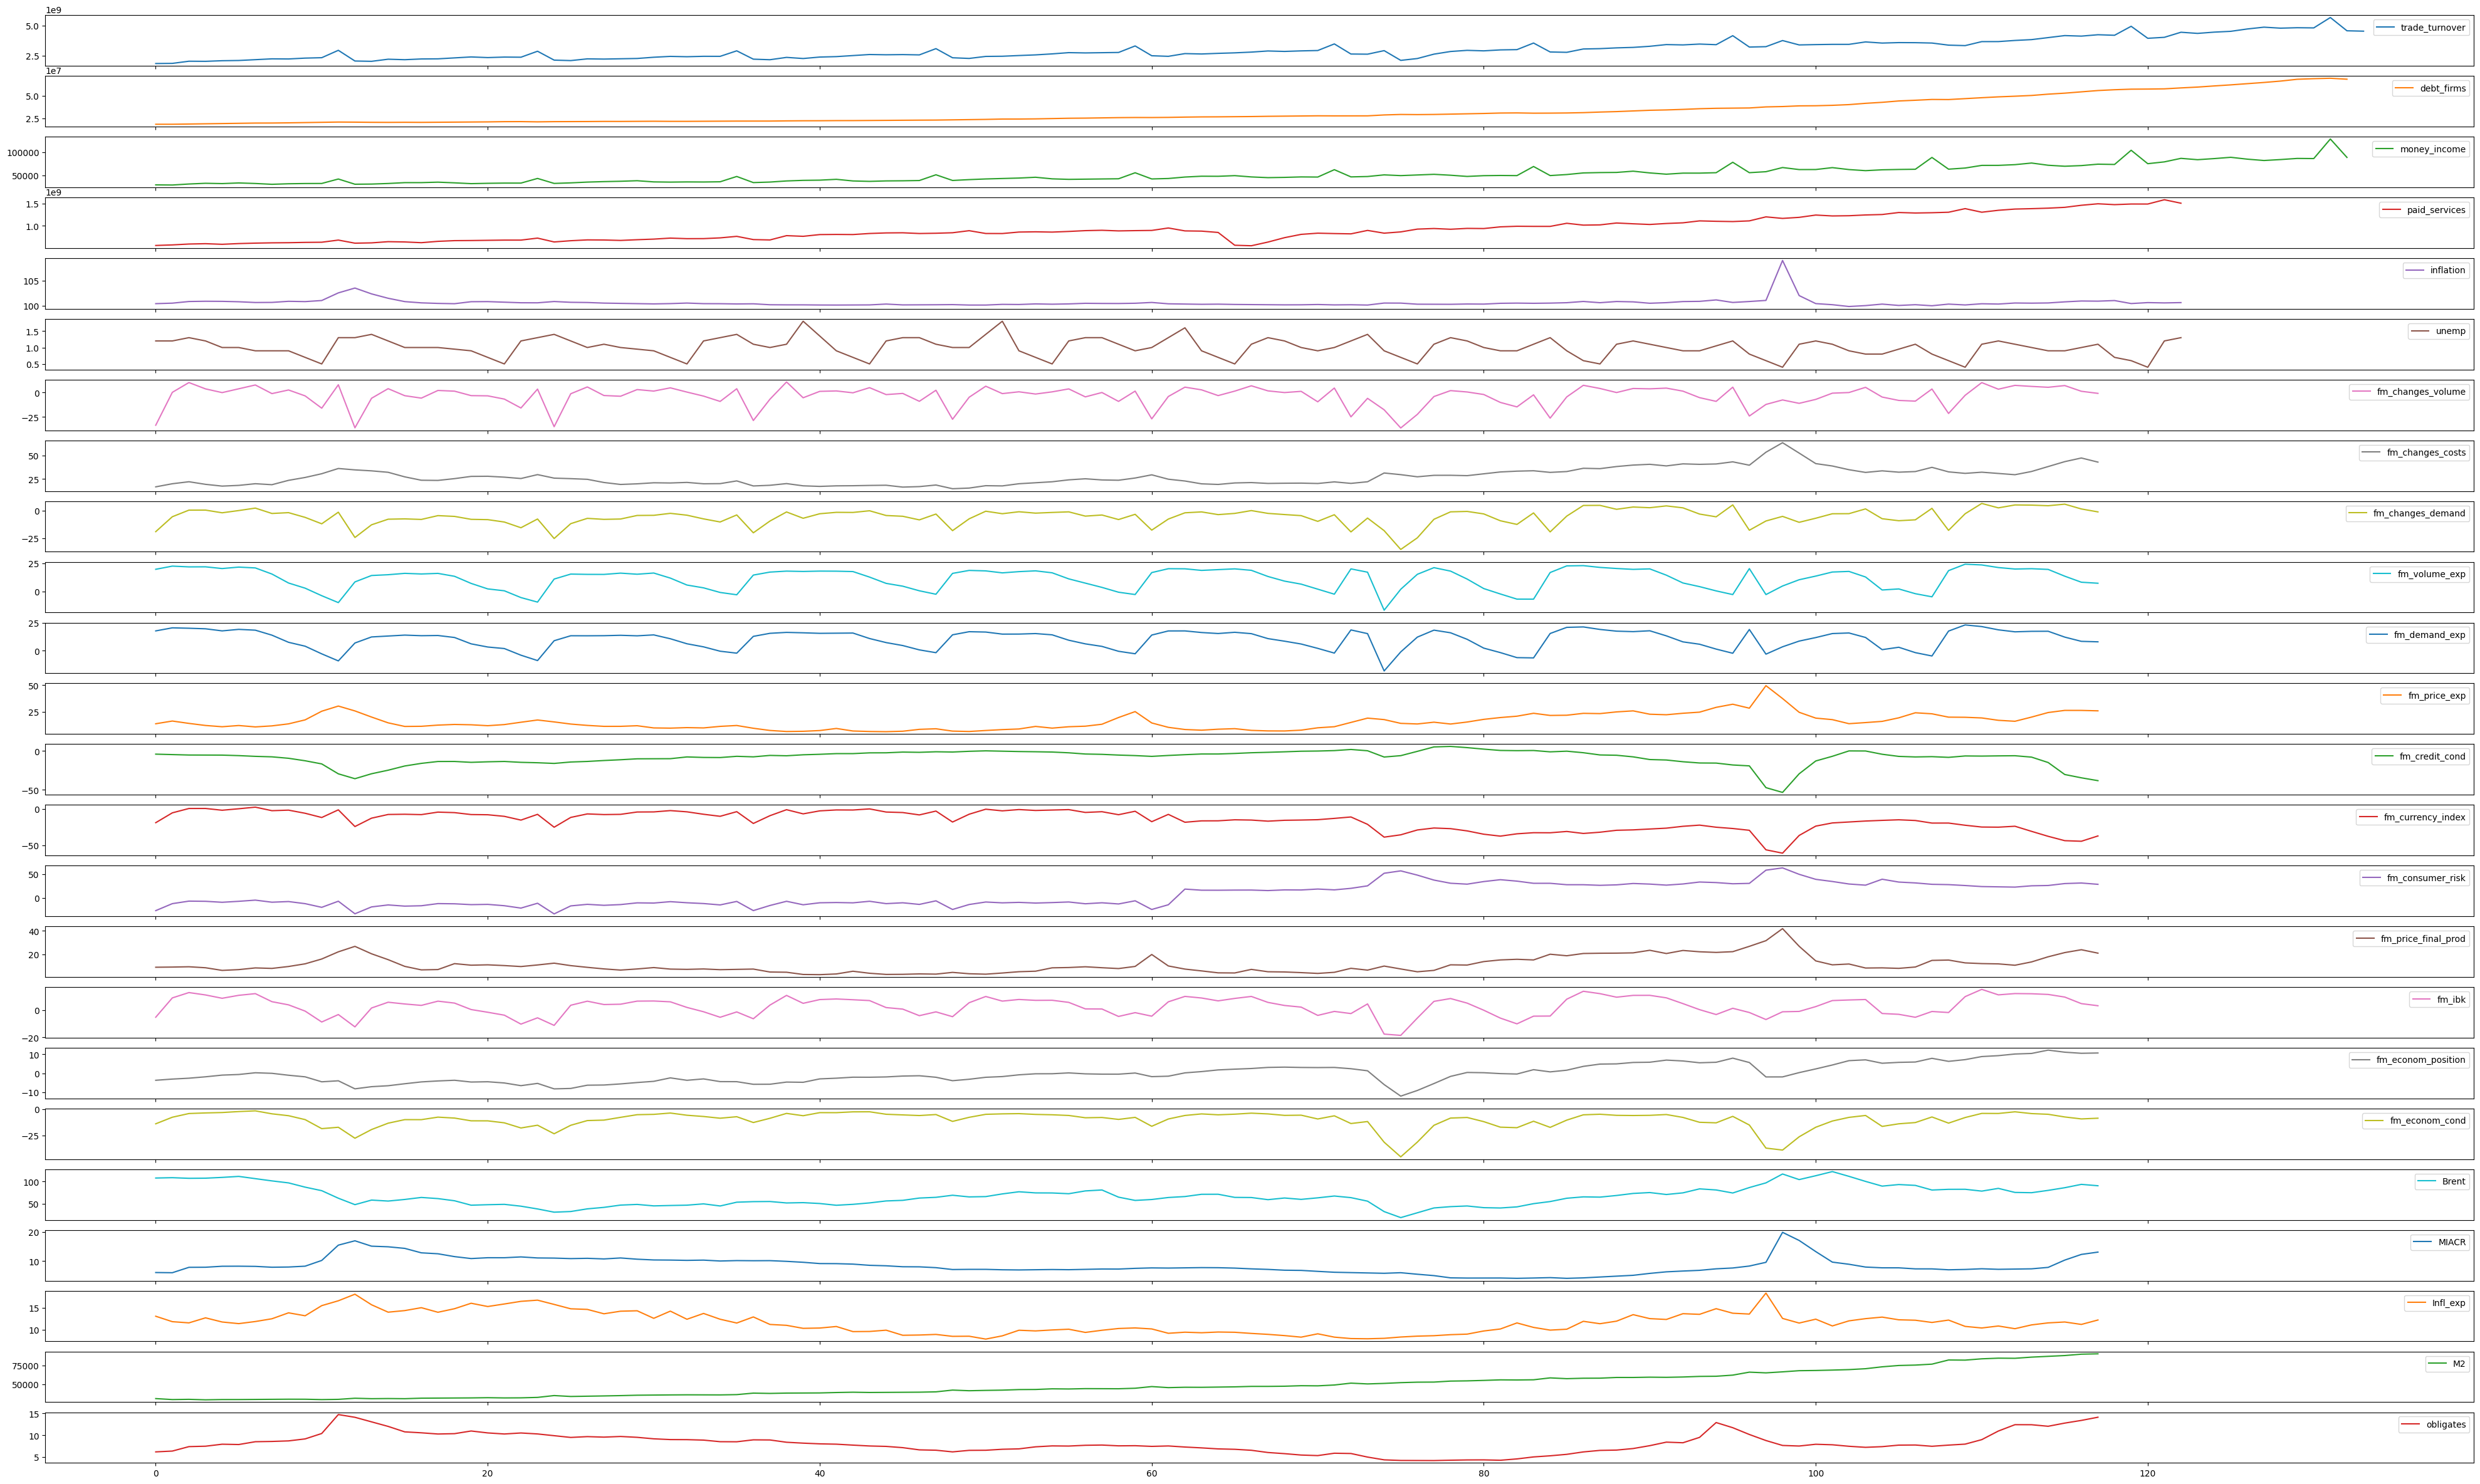

In [21]:
df = pd.read_csv('regional_data/raw_Российская_Федерация.csv');
df.plot(subplots=True, figsize=(50, 30));

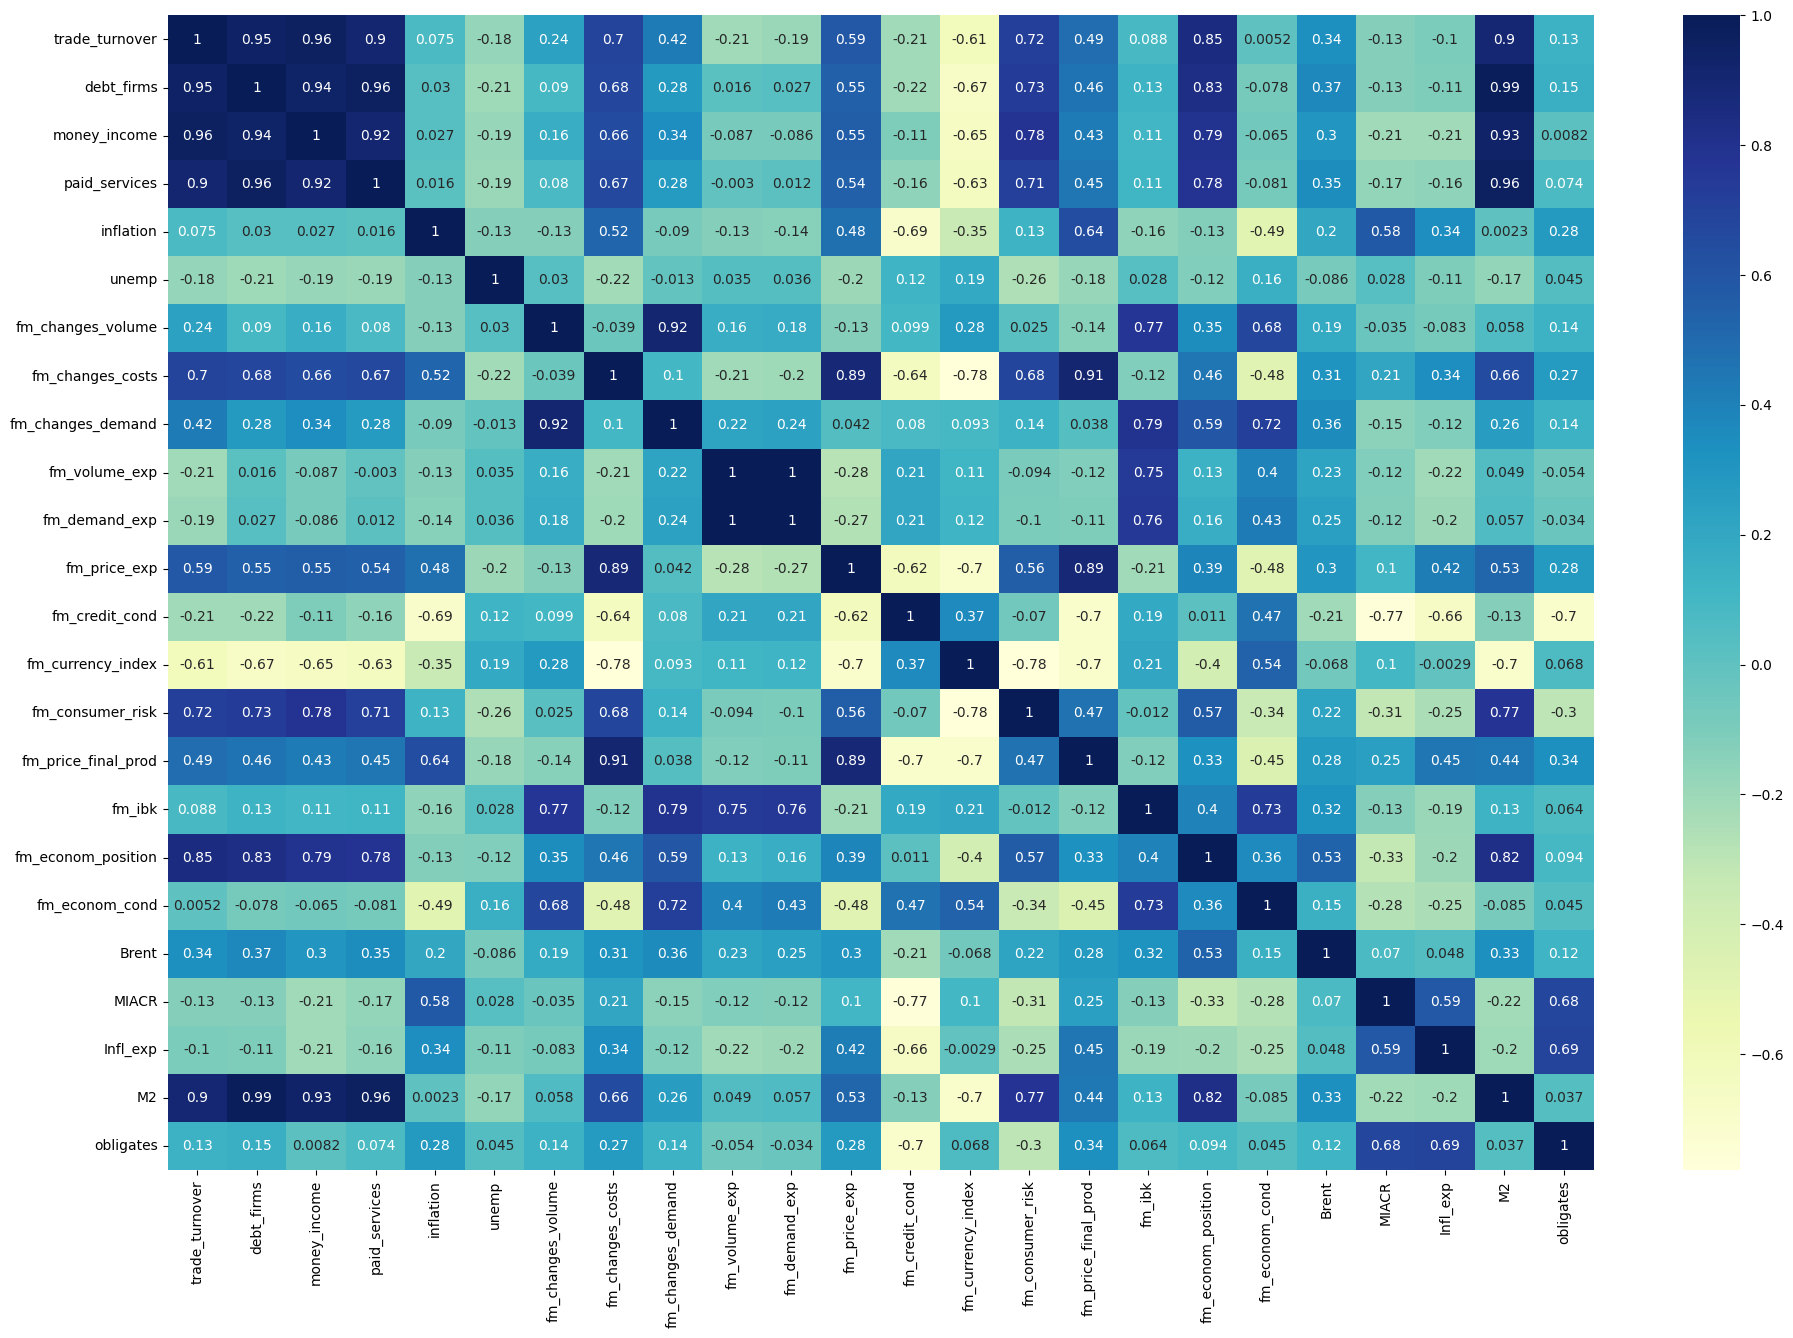

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(23, 15))
sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True);

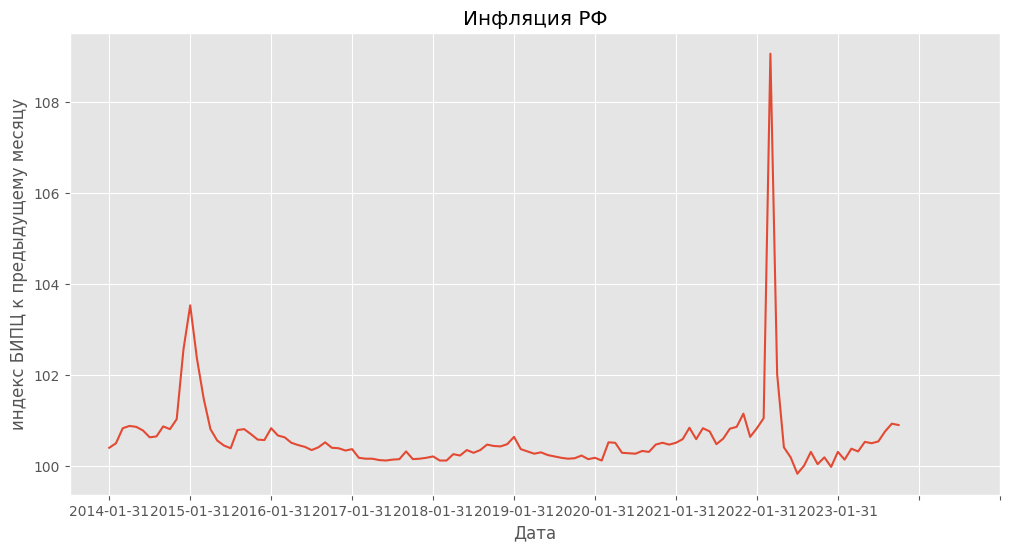

In [91]:
plt.figure(figsize=(12, 6), dpi=100);
plt.style.use('ggplot');
plt.title('Инфляция РФ');
plt.xlabel('Дата');
plt.ylabel('индекс БИПЦ к предыдущему месяцу');
df['ds'] = pd.date_range(start='2014-01-01', periods=len(df), freq='ME').year;
sb.lineplot(df, x='Date', y='inflation');
plt.xticks(np.arange(0, len(df), 12));